In [109]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [110]:
#Uploading csv dataset
data=pd.read_csv('/Users/montu/Downloads/Git/Heart Disease Diagnostic/Heart Disease data/Heart Disease data.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [112]:
#performing exploratory data analysis
data.isnull().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [113]:
data.shape

(1025, 14)

In [114]:
#target variable shows the presence or absence of heart disease
data.groupby('target').size()

target
0    499
1    526
dtype: int64

Text(0.5, 1.0, 'Heart disease population %')

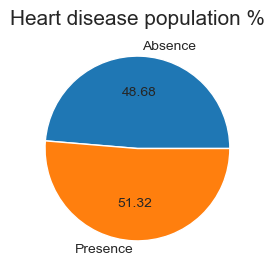

In [115]:
#piechart for % population of heart disease
plt.figure(figsize=(5,3))
plt.pie(data.groupby('target').size(), labels=('Absence', 'Presence'), autopct='%.2f')
plt.title('Heart disease population %', fontsize = 15)

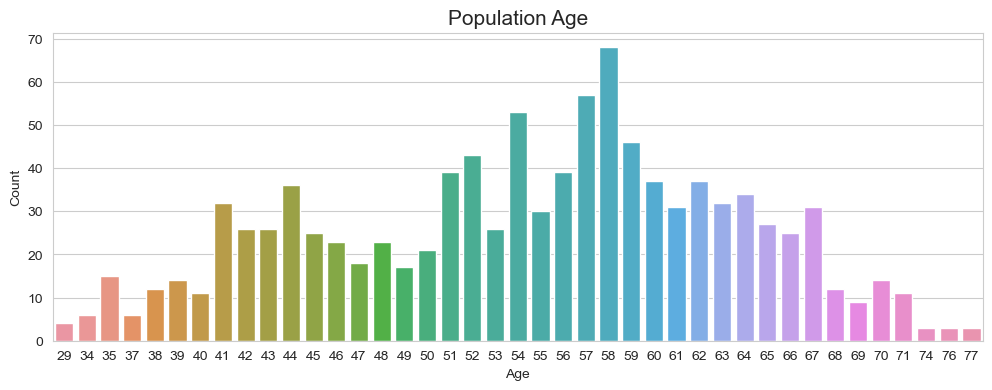

In [116]:
#creating a countplot using Matplotlib and Seaborn for Age attribute
plt.figure(figsize=(12,4))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=15)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

In [117]:
#creating bins for age groups
data.age.min()
data.age.max()

77

In [118]:
#young=29 to 40, middle= 40 to 50, elder= 50 to 60, old=60 to 77
young= data[(data['age']>=29) & (data['age']<=40)]
middle= data[(data['age']>40) & (data['age']<=50)]
elder= data[(data['age']>50) & (data['age']<=60)]
old= data[(data['age']>60) & (data['age']<=77)]

In [119]:
#checking for distribution of male and female in the dataset
def setValueToSex(value):
    if value == 1:
        return "Male"
    else:
        return "Female"

data['SexCategory']= data['sex'].apply(setValueToSex)

In [120]:
def diseaseCategory(value):
    if value==1:
        return 'Disease present'
    else:
        return 'Disease absent'
data['HeartDisease']=data['target'].apply(diseaseCategory)

In [121]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,SexCategory,HeartDisease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male,Disease absent
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male,Disease absent
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male,Disease absent
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male,Disease absent
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female,Disease absent


In [122]:
def setAgeRange(value):
    if value >=29 and value <=40:
        return 'Young'
    elif value >40 and value <=50:
        return 'Middle'
    if value >50 and value <=60:
        return 'Elder'
    else: 
        return 'Old'
data['AgeCategory']=data['age'].apply(setAgeRange)

In [123]:
data['AgeCategory'].value_counts()

AgeCategory
Elder     438
Old       272
Middle    247
Young      68
Name: count, dtype: int64

In [124]:
counts= data.groupby(['SexCategory', 'AgeCategory']). age.count().unstack()

In [125]:
counts

AgeCategory,Elder,Middle,Old,Young
SexCategory,,,,
Female,113,68,114,17
Male,325,179,158,51


<Axes: xlabel='SexCategory'>

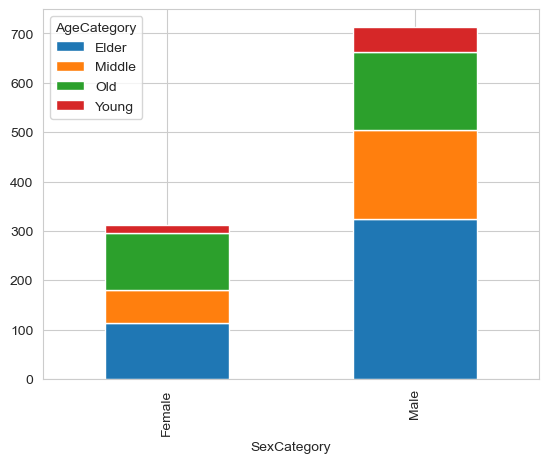

In [126]:
counts.plot(kind='bar', stacked= True)

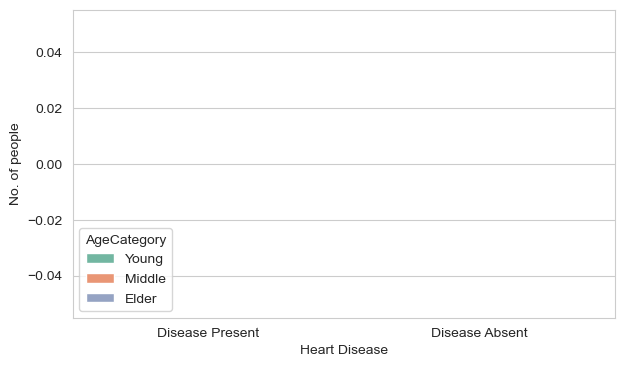

In [127]:
#categorising heart disease based on age
plt.figure(figsize=(7,4))
sns.countplot(x=data['HeartDisease'], hue=data['AgeCategory'], hue_order= ['Young', 'Middle', 'Elder'] ,data=data,order=['Disease Present', 'Disease Absent'], palette= 'Set2')
plt.xlabel('Heart Disease', fontsize= 10)
plt.ylabel('No. of people', fontsize= 10)
plt.show()

In [128]:
%matplotlib inline

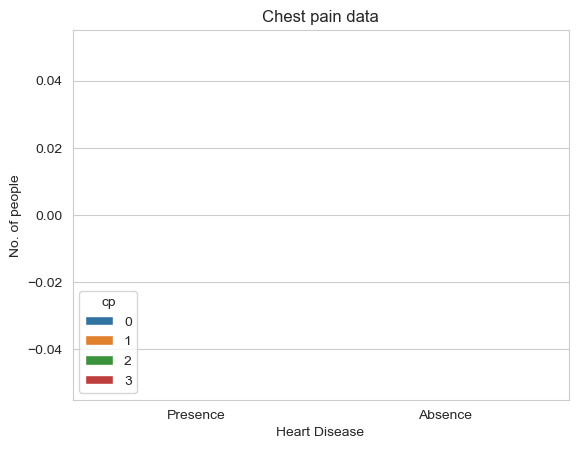

In [129]:
#chest pain experienced - diff kinds 
data['cp'] = data['cp'].astype(str)
sns.countplot(x=data['HeartDisease'], hue='cp', data=data, order=['Presence', 'Absence'])
plt.title('Chest pain data')
plt.xlabel('Heart Disease', fontsize= 10)
plt.ylabel('No. of people', fontsize= 10)
#plt.legend(label=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.show()

In [130]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,SexCategory,HeartDisease,AgeCategory
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male,Disease absent,Elder
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male,Disease absent,Elder
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male,Disease absent,Old
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male,Disease absent,Old
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female,Disease absent,Old


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


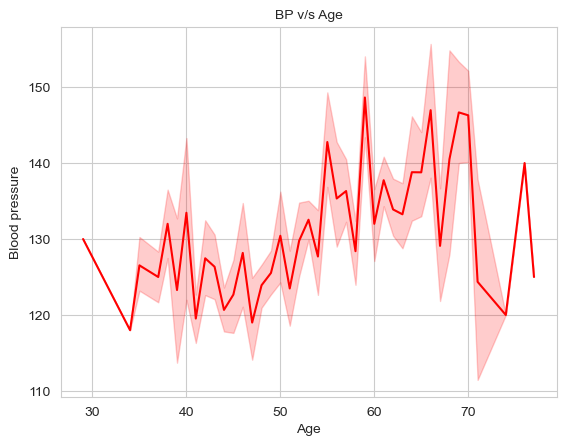

In [131]:
#creating line plot Blood Pressure v/s Age
sns.lineplot(x='age', y='trestbps', data=data, color='r')
plt.title('BP v/s Age', fontsize=10)
plt.xlabel('Age', fontsize= 10)
plt.ylabel('Blood pressure', fontsize= 10)
plt.show()


In [132]:
#computing correlations between variables using heatmap
data= data.drop(['HeartDisease', 'AgeCategory', 'SexCategory'], axis=1) 


<Axes: >

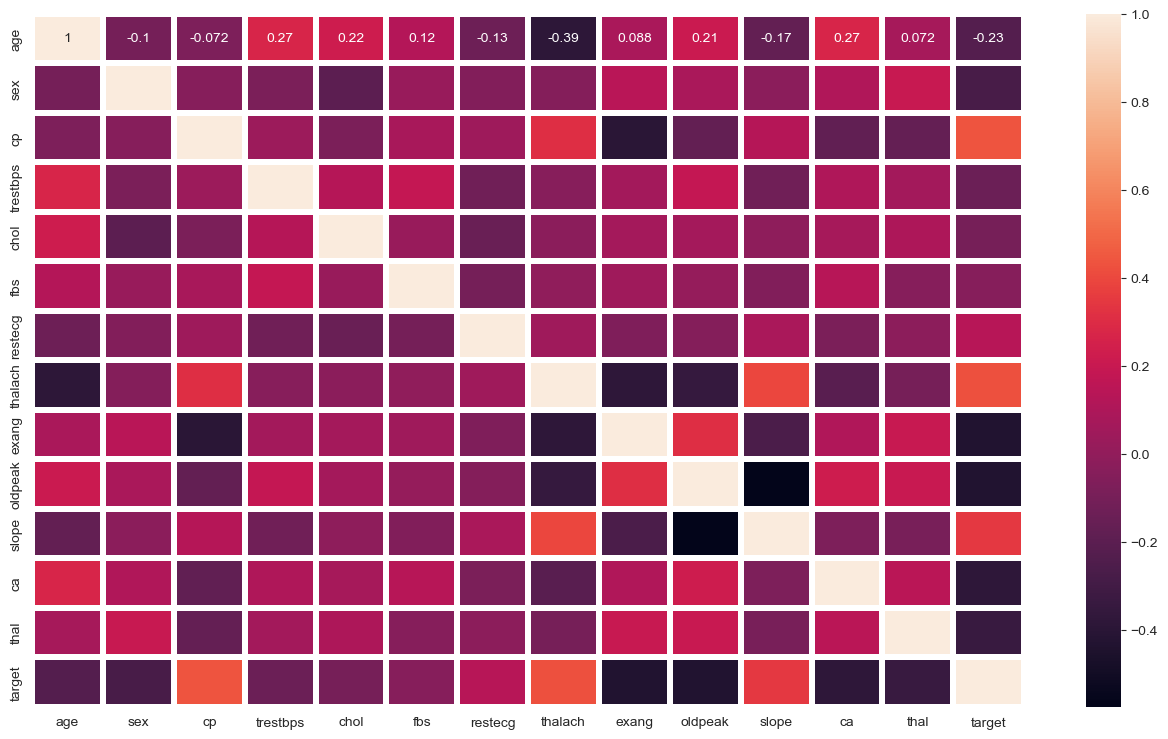

In [133]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True,linewidth=3)